# Data Quality Assessment

Primero vamos a explorar las variables y sus significados, para entender mejor lo que tenemos.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22


In [4]:
columns = list(df.columns)

for column in columns:
    print(column)

disc_number
duration_ms
explicit
track_number
track_popularity
track_id
track_name
audio_features.danceability
audio_features.energy
audio_features.key
audio_features.loudness
audio_features.mode
audio_features.speechiness
audio_features.acousticness
audio_features.instrumentalness
audio_features.liveness
audio_features.valence
audio_features.tempo
audio_features.id
audio_features.time_signature
artist_id
artist_name
artist_popularity
album_id
album_name
album_release_date
album_total_tracks


Exploración de columnas:
- **disc_number:** (entero) Número del disco en que se aloja una pista, es usualmente ya que los álbumes no suelen estar compuestos por más de dos discos.

- **duration_ms:** (entero) Duración de una pista en milisegundos.

- **explicit:** (booleano) True si la pista contiene contentenido explícito o False si no contiene o no se sabe si tiene contenido explícito.
    Prestar atención a este valor, ya que un False no necesariamente indica ausencia de contenido explícito.

- **track_number:** (entero) El número de la pista. Si un álbum tiene varios discos, el número de pista es el número del disco especificado.

- **track_popularity:** (entero) La popularidad de una pista tiene un valor entre 0 y 100, siendo 100 el más popular.<br>
    La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y en lo recientes que son esas reproducciones.<br>
    En términos generales, las canciones que se reproducen mucho ahora tendrán mayor popularidad que las canciones que se reproducen mucho en el pasado.<br>
    Las pistas duplicadas (por ejemplo, la misma pista de una canción y un álbum) se clasifican de forma independiente.<br>
    La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la pista.<br>
    Hay que tener en cuenta que el valor de popularidad puede retrasarse unos días con respecto a la popularidad real ya que el valor no se actualiza en tiempo real.

- **track_id:** (string) Un ID asignado por Spotify para la pista.

- **track_name:** (string) Nombre de la pista.

- **audio_features.danceability:** (punto flotante) La "*bailabilidad*" describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.

- **audio_features.energy:** (punto flotante) La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad.<br>
    Normalmente, las pistas enérgicas se sienten rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach obtiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, velocidad de inicio y entropía general.

- **audio_features.key:** (entero) La clave en la que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de clase de tono.<br>
    Por ejemplo 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente.<br>
    Si no se detectó ninguna clave, el valor es -1. **(Prestar atención a este valor)**<br>
    Rango: -1 - 11

- **audio_features.loudness:** (punto flotante) El volumen general de una pista en decibeles (dB).<br>
    Los valores de sonoridad se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.



- **audio_features.mode:** (entero) Modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico.<br>
El mayor está representado por 1 y el menor es 0.



- **audio_features.speechiness:** (punto flotante) Speechiness detecta la presencia de palabras habladas en una pista.<br>
    Cuanto más exclusivamente hablada sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cercano a 1,0 será el valor del atributo.<br>
    Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente de palabras habladas.<br>
    Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap.<br>
    Los valores inferiores a 0,33 probablemente representen música y otras pistas que no sean de voz.

- **audio_features.acousticness:** (punto flotante) Una medida de confianza de 0,0 a 1,0 sobre si la pista es acústica.<br>
    1.0 representa una alta confianza en que la pista es acústica.

- **audio_features.instrumentalness:** (punto flotante) Predice si una pista no contiene voces.<br>
    Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto.<br>
    Las pistas de rap o de palabra hablada son claramente "vocales".<br>
    Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal.<br>
    Los valores superiores a 0,5 pretenden representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

- **audio_features.liveness:** (punto flotante) Detecta la presencia de una audiencia en la grabación. Los valores de vida más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.

- **audio_features.valence:** (punto flotante) Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista.<br>
    Las pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

- **audio_features.tempo:** (punto flotante) El tempo general estimado de una pista en pulsaciones por minuto (BPM).<br>
    En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del tiempo.

- **audio_features.id:**  (string) Un ID asignado por Spotify para la pista. ( controlar si es igual a track_id)

- **audio_features.time_signature:** (punto flotante) Un compás estimado. El tipo de compás (metro) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás).
    El tipo de compás varía de 3 a 7, lo que indica tipos de compás de "3/4" a "7/4".
    Rango: 3 - 7

- **artist_id:** (string) Un ID asignado por Spotify para el artista.

- **artist_name:** (string) Nombre del artista.

- **artist_popularity:** La popularidad del artista.<br>
     El valor estará entre 0 y 100, siendo 100 el más popular.<br>
     La popularidad del artista se calcula a partir de la popularidad de todas sus pistas.

- **album_id:** (string) Un ID asignado por Spotify para el album.

- **album_name:** (string) Nombre del album.

- **album_release_date:** La fecha en que se lanzó el álbum por primera vez.<br>
    Ejemplo: "1981-12"

- **album_total_tracks:** (entero) Cantidad de pistas en un album.

---

Comprobamos la variable track_number, que en un segundo disco, las pistas arrancan desde 1 y no continúan el conteo del primer disco

In [5]:
cd2 = df[df['disc_number'] == 2]
cd2[['disc_number', 'track_number']]

,disc_number,track_number
227,2,1
228,2,2
229,2,3
230,2,4
231,2,5
232,2,6
233,2,7
234,2,8
235,2,9
236,2,10


En este caso el disco dos no arranca con la pista **18**, si no que con la pista **1**.

In [6]:
cd2 = df.iloc[220:235,:]
cd2[['album_name','disc_number', 'track_number']]

,album_name,disc_number,track_number
220,folklore: the long pond studio sessions (from ...,1,11
221,folklore: the long pond studio sessions (from ...,1,12
222,folklore: the long pond studio sessions (from ...,1,13
223,folklore: the long pond studio sessions (from ...,1,14
224,folklore: the long pond studio sessions (from ...,1,15
225,folklore: the long pond studio sessions (from ...,1,16
226,folklore: the long pond studio sessions (from ...,1,17
227,folklore: the long pond studio sessions (from ...,2,1
228,folklore: the long pond studio sessions (from ...,2,2
229,folklore: the long pond studio sessions (from ...,2,3


---

### Breve Exploración

In [7]:
df.shape

(539, 27)

In [8]:
df.describe()

,disc_number,duration_ms,track_number,track_popularity,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature,artist_popularity
count,539.000000,539.000000,539.000000,539.000000,537.000000,537.000000,538.000000,537.000000,539.000000,538.000000,538.000000,538.000000,539.000000,538.000000,538.000000,539.0
mean,1.031540,236003.725417,11.280148,62.918367,0.587242,0.573065,4.587361,-7.520639,0.912801,0.057709,0.337806,0.163308,0.398410,122.362639,3.986989,120.0
std,0.174934,55019.871010,7.965621,22.498757,0.116858,0.192309,3.246082,2.933158,0.282388,0.073146,0.395292,0.141800,0.199409,30.485522,0.197323,0.0
min,1.000000,-223093.000000,1.000000,-92.000000,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540,0.033500,0.037400,68.097000,3.000000,120.0
25%,1.000000,209486.500000,5.000000,51.000000,0.517000,0.436000,2.000000,-9.287000,1.000000,0.030525,0.036250,0.096500,0.230000,96.684500,4.000000,120.0
50%,1.000000,233626.000000,10.000000,69.000000,0.595000,0.589000,5.000000,-6.942000,1.000000,0.037750,0.167500,0.115000,0.386000,119.000500,4.000000,120.0
75%,1.000000,259045.500000,15.000000,77.000000,0.661000,0.729000,7.000000,-5.376000,1.000000,0.056400,0.663750,0.162250,0.535000,143.939000,4.000000,120.0
max,2.000000,613026.000000,46.000000,152.000000,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000,0.931000,0.943000,208.918000,5.000000,120.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   disc_number                      539 non-null    int64  
 1   duration_ms                      539 non-null    int64  
 2   explicit                         539 non-null    object 
 3   track_number                     539 non-null    int64  
 4   track_popularity                 539 non-null    int64  
 5   track_id                         531 non-null    object 
 6   track_name                       532 non-null    object 
 7   audio_features.danceability      537 non-null    float64
 8   audio_features.energy            537 non-null    float64
 9   audio_features.key               538 non-null    float64
 10  audio_features.loudness          537 non-null    float64
 11  audio_features.mode              539 non-null    int64  
 12  audio_features.speechi

---

### Completeness

Cabe destacar que acá solo vamos a tener en cuenta los datos nulos, no los posibles datos vacíos o con registros incorrectos, ni tampoco las posibles columnas repetidas.

Cantidad de nulos por columnas

In [10]:
df.isnull().sum()

disc_number                         0
duration_ms                         0
explicit                            0
track_number                        0
track_popularity                    0
track_id                            8
track_name                          7
audio_features.danceability         2
audio_features.energy               2
audio_features.key                  1
audio_features.loudness             2
audio_features.mode                 0
audio_features.speechiness          1
audio_features.acousticness         1
audio_features.instrumentalness     0
audio_features.liveness             1
audio_features.valence              0
audio_features.tempo                1
audio_features.id                   0
audio_features.time_signature       1
artist_id                           0
artist_name                         0
artist_popularity                   0
album_id                            0
album_name                         62
album_release_date                  0
album_total_

Porcentaje de nulos por columnas

In [11]:
df.isnull().sum() / df.shape[0] * 100

disc_number                         0.000000
duration_ms                         0.000000
explicit                            0.000000
track_number                        0.000000
track_popularity                    0.000000
track_id                            1.484230
track_name                          1.298701
audio_features.danceability         0.371058
audio_features.energy               0.371058
audio_features.key                  0.185529
audio_features.loudness             0.371058
audio_features.mode                 0.000000
audio_features.speechiness          0.185529
audio_features.acousticness         0.185529
audio_features.instrumentalness     0.000000
audio_features.liveness             0.185529
audio_features.valence              0.000000
audio_features.tempo                0.185529
audio_features.id                   0.000000
audio_features.time_signature       0.185529
artist_id                           0.000000
artist_name                         0.000000
artist_pop

In [12]:
nulos = df.isnull().sum().sum()

print(f"En el data frame tenemos {nulos} registros nulos.")

porcentaje_nulos = round(nulos / df.size * 100, 2)

print(f"Estos datos nulos representan un {porcentaje_nulos}% del total de la data.")

completeness = 100 - porcentaje_nulos

print(f'Completeness = {completeness}%')

En el data frame tenemos 89 registros nulos.
Estos datos nulos representan un 0.61% del total de la data.
Completeness = 99.39%


<Axes: >

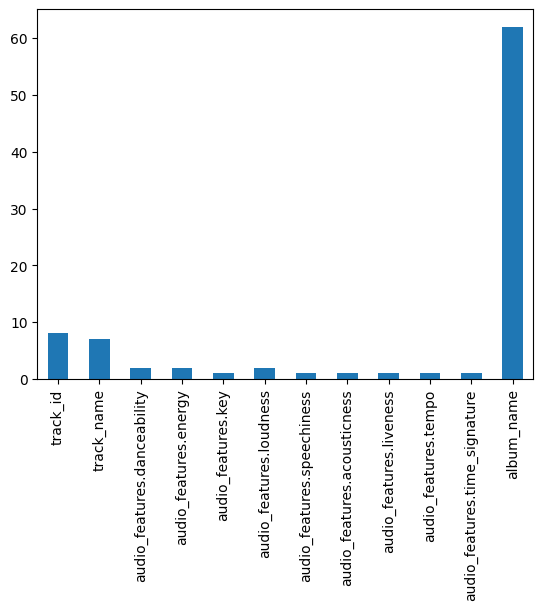

In [13]:
df.isna().sum()[df.isna().sum() > 0].plot(kind='bar')

#### Conclusión sobre Completeness:

En este dataset tenemos muchas variables repetidas, dada su naturaleza de venir desde una base de datos relacional, desde mi punto de vista la información mas importante es la de las columnas específicas de cada pista, por lo que solo voy a tomar esas columnas al evaluar la integridad del dataset.

#### Completeness = 99.39%

---

### Uniqueness

Vamos a listar los valores únicos de algunas columnas, para analizarlas, vamos a exceptuar las columnas con variables continuas.

Deberíamos cumplir con algunas espectativas:
- explicit True or False
- track_id >= track_name
- audio_features.key entre -1 y 11 (13 + nan)
- audio_features.id == track_id
- audio_features.time_signature entre 3 y 7 (5 + nan)
- album_name == album_id == album_release_date


In [14]:
# explicit True or False
# track_id >= track_name
# audio_features.key entre -1 y 11 (13 + nan)
# audio_features.id == track_id
# audio_features.time_signature entre 3 y 7 (5 + nan)
# album_name == album_id == album_release_date

df[['disc_number',
    'explicit',
    'track_id',
    'track_name',
    'audio_features.key',
    'audio_features.id',
    'audio_features.time_signature',
    'artist_id',
    'artist_name',
    'artist_popularity',
    'album_id',
    'album_name',
    'album_release_date'
    ]].nunique()

disc_number                        2
explicit                           4
track_id                         512
track_name                       331
audio_features.key                12
audio_features.id                519
audio_features.time_signature      3
artist_id                          1
artist_name                        1
artist_popularity                  1
album_id                          26
album_name                        24
album_release_date                23
dtype: int64

In [15]:
df['audio_features.key'].unique()

array([ 7.,  0., 11.,  8.,  5.,  1.,  4.,  3.,  9.,  2., 10.,  6., nan])

En la columna de contenido explícito vemos una incosistencia de los datos, ya que no solo tenemos True or False, si no que también tenemos Si y No.

In [16]:
df.explicit.unique()

array(['False', 'True', 'Si', 'No'], dtype=object)

In [17]:
df['audio_features.time_signature'].unique()

array([ 4.,  3.,  5., nan])

En las fechas vemos que todos los valores están en un formato correcto (mas adelante lo vamos a comprobar con código, ya que es en este caso tenemos pocas, pero en una base de datos grandes deberíamos poder comprobar el formato de la misma con código).
También vemos que todos los valores son únicos por lo que cumple con lo que buscamos en esta sección, mas adelante veremos también los valores fuera de rango.

In [18]:
fechas = list(df['album_release_date'].unique())
fechas.sort()
fechas

['1989-10-24',
 '2008-06-28',
 '2008-11-11',
 '2010-01-01',
 '2010-10-25',
 '2012-10-22',
 '2014-01-01',
 '2017-11-09',
 '2017-11-10',
 '2019-08-23',
 '2020-07-24',
 '2020-08-18',
 '2020-11-25',
 '2020-12-11',
 '2021-01-07',
 '2021-04-09',
 '2021-11-12',
 '2022-10-21',
 '2022-10-22',
 '2023-07-07',
 '2023-10-26',
 '2023-10-27',
 '2027-05-26']

Podemos ver que la columna **track_id** no solo es redundante, ya que el contenido es exactamente el mismo que el de la columna **audio_features.id**, si no que también aporta datos faltantes.

In [19]:
df.track_id.compare(df['audio_features.id'])

,self,other
321,NaN,1ZY1PqizIl78geGM4xWlEA
363,NaN,5zytSTR2g0I9psX2Z12ex6
375,NaN,3nRmDz7qGCvsMS30rGGY0x
379,NaN,6aLOekfwbytwWvQftxTEF0
382,NaN,2NlmmAjGYrrjAp0MED5rGx
434,NaN,1IsquhJFJ0qcFZI7FeAEuN
442,NaN,3lm4L3pPL32PFy74dR17OR
445,NaN,0GxW5K0qzrq7L1jwSY5OmY


Vemos la cantidad de registros iguales en todas sus variables.

In [20]:
duplicados = df[df.duplicated(keep=False)]
duplicados.shape[0]

36

Vamos a remover la columna **track_id**, para que no tengamos una influencia de sus NaNs en el chequeo de datos iguales.

In [21]:
df.drop('track_id', axis=1, inplace=True)

Sin esta columna obtenemos dos duplicados más, 38 registros duplicadosen en total, vamos a ver por que.

In [22]:
duplicados = df[df.duplicated(keep=False)]
duplicados.shape[0]

38

In [23]:
id_grouped = df[['album_name', 'album_id']].groupby('album_id')
id_grouped.describe()

album_name         \
                            count unique   
album_id                                   
08CWGiv27MVQhYpuTtvx83         16      1   
0PZ7lAru5FDFHuirTkWe9Z         34      1   
151w1FgRZfnKZA9FEcg9Z3         13      1   
1KVKqWeRuXsJDLTW0VuD29         22      1   
1MPAXuTVL2Ej5x0JHiSPq8          0      0   
1NAmidJlEaVgA3MpcPFYGq         36      1   
1fnJ7k0bllNfL1kVdNVW1A         24      1   
1o59UpKw81iHR0HPiSkJR0         22      1   
1pzvBxYgT6OVwJLtHkrdQK         17      1   
1yGbNOtRIgdIiGHOEBaZWf         19      1   
1ycoesYxIFymXWebfmz828          8      1   
2Xoteh7uEpea4TohMxjtaq         15      1   
2fenSS68JI1h4Fo296JfGr         16      1   
2gP2LMVcIFgVczSJqn340t         19      1   
3lS1y25WAhcqJDATJK70Mq         20      1   
4hDok0OAJd57SGIT8xuWJH         26      1   
5AEDGbliTTfjOB8TSm1sxt         22      1   
5eyZZoQEFQWRHkV2xgAeBw         15      1   
5fy0X0JmZRZnVa2UEicIOl         13      1   
64LU4c1nfjz1t4VnGhagcg         21      1   
6AORtDjduMM3bupSWzbTSG         17      1   
6Ar2o9KCqcyYF9J0aQP3au         14      1   
6DEjYFkNZh67HP7R9PSZvv         16      1   
6S6JQWzUrJVcJLK4fi74Fw         22      1   
6fyR4wBPwLHKcRtxgd4sGh          0      0   
6kZ42qRrzov54LcAk4onW9         30      1   

                                                                                
                                                                      top freq  
album_id                                                                        
08CWGiv27MVQhYpuTtvx83                   Fearless (International Version)   16  
0PZ7lAru5FDFHuirTkWe9Z  folklore: the long pond studio sessions (from ...   34  
151w1FgRZfnKZA9FEcg9Z3                                          Midnights   13  
1KVKqWeRuXsJDLTW0VuD29                               Red (Deluxe Edition)   22  
1MPAXuTVL2Ej5x0JHiSPq8                                                NaN  NaN  
1NAmidJlEaVgA3MpcPFYGq                                              Lover   36  
1fnJ7k0bllNfL1kVdNVW1A                   Midnights (The Til Dawn Edition)   24  
1o59UpKw81iHR0HPiSkJR0                   1989 (Taylor's Version) [Deluxe]   22  
1pzvBxYgT6OVwJLtHkrdQK                          folklore (deluxe version)   17  
1yGbNOtRIgdIiGHOEBaZWf                                      1989 (Deluxe)   19  
1ycoesYxIFymXWebfmz828              Live From Clear Channel Stripped 2008    8  
2Xoteh7uEpea4TohMxjtaq                                           evermore   15  
2fenSS68JI1h4Fo296JfGr                                           folklore   16  
2gP2LMVcIFgVczSJqn340t                        Fearless (Platinum Edition)   19  
3lS1y25WAhcqJDATJK70Mq                            Midnights (3am Edition)   20  
4hDok0OAJd57SGIT8xuWJH                        Fearless (Taylor's Version)   26  
5AEDGbliTTfjOB8TSm1sxt                       Speak Now (Taylor's Version)   22  
5eyZZoQEFQWRHkV2xgAeBw                                       Taylor Swift   15  
5fy0X0JmZRZnVa2UEicIOl                                               1989   13  
64LU4c1nfjz1t4VnGhagcg                            1989 (Taylor's Version)   21  
6AORtDjduMM3bupSWzbTSG                          evermore (deluxe version)   17  
6Ar2o9KCqcyYF9J0aQP3au                                          Speak Now   14  
6DEjYFkNZh67HP7R9PSZvv                                         reputation   16  
6S6JQWzUrJVcJLK4fi74Fw                         Speak Now (Deluxe Package)   22  
6fyR4wBPwLHKcRtxgd4sGh                                                NaN  NaN  
6kZ42qRrzov54LcAk4onW9                             Red (Taylor's Version)   30

Vemos una inconsistencia en 2 variables de album_id. Vamos a profundizar.

In [24]:
df[df['album_id'] == '1MPAXuTVL2Ej5x0JHiSPq8'][['album_id', 'album_name']]

,album_id,album_name
329,1MPAXuTVL2Ej5x0JHiSPq8,NaN
330,1MPAXuTVL2Ej5x0JHiSPq8,NaN
331,1MPAXuTVL2Ej5x0JHiSPq8,NaN
332,1MPAXuTVL2Ej5x0JHiSPq8,NaN
333,1MPAXuTVL2Ej5x0JHiSPq8,NaN
334,1MPAXuTVL2Ej5x0JHiSPq8,NaN
335,1MPAXuTVL2Ej5x0JHiSPq8,NaN
336,1MPAXuTVL2Ej5x0JHiSPq8,NaN
337,1MPAXuTVL2Ej5x0JHiSPq8,NaN
338,1MPAXuTVL2Ej5x0JHiSPq8,NaN


In [25]:
df[df['album_id'] == '6fyR4wBPwLHKcRtxgd4sGh'][['album_id', 'album_name']]

,album_id,album_name
429,6fyR4wBPwLHKcRtxgd4sGh,NaN
430,6fyR4wBPwLHKcRtxgd4sGh,NaN
431,6fyR4wBPwLHKcRtxgd4sGh,NaN
432,6fyR4wBPwLHKcRtxgd4sGh,NaN
433,6fyR4wBPwLHKcRtxgd4sGh,NaN
434,6fyR4wBPwLHKcRtxgd4sGh,NaN
435,6fyR4wBPwLHKcRtxgd4sGh,NaN
436,6fyR4wBPwLHKcRtxgd4sGh,NaN
437,6fyR4wBPwLHKcRtxgd4sGh,NaN
438,6fyR4wBPwLHKcRtxgd4sGh,NaN


Aparentemente hay dos Nombres de álbumes faltantes, dado que la información se toma de un archivo .json, conformado por listas anidadas, 2 nombres faltantes, nos terminan generando 62 registros incompletos.

Contador rústico de álbumes basado en cantidad de pistas número uno, en cd número 1

In [26]:
album_counter = 0

for i in range(df.shape[0]):
    if (df.iloc[i, 0] == 1) and (df.iloc[i, 3] == 1): # column 0 = disc_number, column 3 = track_number
        album_counter += 1

album_counter

27

Pareciera ser que hay un album repetido. Vamos a chequear mejor creando una columna aparte para controlar.

In [27]:
df_control = df.copy()
df_control['control_album'] = False

for i in range(df.shape[0]):
    if (df.iloc[i, 0] == 1) and (df.iloc[i, 3] == 1): # column 0 = disc_number, column 3 = track_number
        df_control.iloc[i, -1] = True

df_control[['disc_number', 'track_number', 'control_album','audio_features.id']].head()

,disc_number,track_number,control_album,audio_features.id
0,1,1,True,4WUepByoeqcedHoYhSNHRt
1,1,2,False,0108kcWLnn2HlH2kedi1gn
2,1,3,False,3Vpk1hfMAQme8VJ0SNRSkd
3,1,4,False,1OcSfkeCg9hRC2sFKB4IMJ
4,1,5,False,2k0ZEeAqzvYMcx9Qt5aClQ


In [28]:
df_control = df_control[df_control.control_album == True]
df_control = df_control[['disc_number', 'track_number', 'control_album', 'album_name', 'album_id', 'audio_features.id']]
df_control = df_control[df_control.duplicated(keep=False)]
df_control

,disc_number,track_number,control_album,album_name,album_id,audio_features.id
277,1,1,True,Lover,1NAmidJlEaVgA3MpcPFYGq,43rA71bccXFGD4C8GOpIlN
295,1,1,True,Lover,1NAmidJlEaVgA3MpcPFYGq,43rA71bccXFGD4C8GOpIlN


Parece que tenemos un album duplicado.

In [29]:
album_duplicado = df[df['album_id'] == '1NAmidJlEaVgA3MpcPFYGq']

album_duplicado[['track_name', 'track_number', 'album_name']]

,track_name,track_number,album_name
277,I Forgot That You Existed,1,Lover
278,Cruel Summer,2,Lover
279,Lover,3,Lover
280,The Man,4,Lover
281,The Archer,5,Lover
282,I Think He Knows,6,Lover
283,Miss Americana & The Heartbreak Prince,7,Lover
284,Paper Rings,8,Lover
285,Cornelia Street,9,Lover
286,Death By A Thousand Cuts,10,Lover


Podemos ver que efectivamente tenemos un album duplicado, esto nos explica 18 de los 20 registros duplicados en las pisatas, vamos a ver si encontramos las duplicadas y si son un problema.

In [30]:
sin_cd_duplicado = df[df['album_id'] != '1NAmidJlEaVgA3MpcPFYGq'][['track_name', 'audio_features.id']]

In [31]:
sin_cd_duplicado = sin_cd_duplicado[sin_cd_duplicado['audio_features.id'].duplicated(keep=False)]
sin_cd_duplicado

,track_name,audio_features.id
85,Hits Different,3xYJScVfxByb61dYHTwiby
88,Hits Different,3xYJScVfxByb61dYHTwiby
320,Gorgeous,1ZY1PqizIl78geGM4xWlEA
321,Gorgeous,1ZY1PqizIl78geGM4xWlEA


In [32]:
# lista_duplicadas = ['3xYJScVfxByb61dYHTwiby', '1ZY1PqizIl78geGM4xWlEA']
pistas_dup = df[(df['audio_features.id'] == '3xYJScVfxByb61dYHTwiby') | (df['audio_features.id'] == '1ZY1PqizIl78geGM4xWlEA')]
pistas_dup.duplicated(keep=False)

85     True
88     True
320    True
321    True
dtype: bool

También vemos que tenemos dos pistas duplicadas, dentro de un mismo cd.

Este álbum duplicado junto a el tema duplicado nos explican los 38 registros duplicados.

(2 álbumes x 18 pistas) + 2 pistas x 2 = 40 registros duplicados

In [33]:
album_duplicado1 = df.iloc[277:295].reset_index()
album_duplicado2 = df.iloc[295:313].reset_index()

print(album_duplicado1.equals(album_duplicado2))
print(album_duplicado1.compare(album_duplicado2))

False
   index       explicit      
    self other     self other
0    277   295      NaN   NaN
1    278   296    False    No
2    279   297      NaN   NaN
3    280   298      NaN   NaN
4    281   299      NaN   NaN
5    282   300      NaN   NaN
6    283   301      NaN   NaN
7    284   302      NaN   NaN
8    285   303      NaN   NaN
9    286   304      NaN   NaN
10   287   305      NaN   NaN
11   288   306      NaN   NaN
12   289   307      NaN   NaN
13   290   308      NaN   NaN
14   291   309      NaN   NaN
15   292   310      NaN   NaN
16   293   311      NaN   NaN
17   294   312      NaN   NaN


In [34]:
album_duplicado[['track_number', 'audio_features.id', 'album_id']]

,track_number,audio_features.id,album_id
277,1,43rA71bccXFGD4C8GOpIlN,1NAmidJlEaVgA3MpcPFYGq
278,2,1BxfuPKGuaTgP7aM0Bbdwr,1NAmidJlEaVgA3MpcPFYGq
279,3,1dGr1c8CrMLDpV6mPbImSI,1NAmidJlEaVgA3MpcPFYGq
280,4,3RauEVgRgj1IuWdJ9fDs70,1NAmidJlEaVgA3MpcPFYGq
281,5,3pHkh7d0lzM2AldUtz2x37,1NAmidJlEaVgA3MpcPFYGq
282,6,2YWtcWi3a83pdEg3Gif4Pd,1NAmidJlEaVgA3MpcPFYGq
283,7,214nt20w5wOxJnY462klLw,1NAmidJlEaVgA3MpcPFYGq
284,8,4y5bvROuBDPr5fuwXbIBZR,1NAmidJlEaVgA3MpcPFYGq
285,9,12M5uqx0ZuwkpLp5rJim1a,1NAmidJlEaVgA3MpcPFYGq
286,10,2dgFqt3w9xIQRjhPtwNk3D,1NAmidJlEaVgA3MpcPFYGq


Vemos que pudimos encontrar un duplicado más, ya que hay una diferencia en la pista 2, vamos a ver cual es la diferencia.

In [35]:
df_tema2 = df[(df['audio_features.id'] == '1BxfuPKGuaTgP7aM0Bbdwr') & (df['album_id'] == '1NAmidJlEaVgA3MpcPFYGq')]
df_tema2

,disc_number,duration_ms,explicit,track_number,track_popularity,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
278,1,178426,False,2,99,Cruel Summer,0.552,0.702,9.0,-5.707,...,169.994,1BxfuPKGuaTgP7aM0Bbdwr,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
296,1,178426,No,2,99,Cruel Summer,0.552,0.702,9.0,-5.707,...,169.994,1BxfuPKGuaTgP7aM0Bbdwr,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18


Finalmente comparando ambos temas, podemos ver que hay una diferencia en la variable **explicit**, lo cual pienso que se podría dar debido a que una de las canciones tenga censura, pero de ser así tendría que tener otro identificador único, aparte de que en la documentación de Spotify explica que un False en la variable explicit no necesariamente significa que no posee contenido explícito.
Aparte de todo eso, está en un álbum claramente duplicado.

In [36]:
repetidos_columna = 1 * df.shape[0]

repetiodos_filas = (df.shape[1] - 1) * 20 # 20 canciones, restamos una columna que ya contemplamos en repetidos_columna

total_repetidos = repetidos_columna + repetiodos_filas

porcentaje_repetidos = round(100 - (total_repetidos / df.size * 100), 2)

print(f'Uniqueness = {porcentaje_repetidos}%')

Uniqueness = 92.59%


#### Conclusión Uniqueness

Si bien hay información que se repite en todas las filas, como el nombre del artista, su popularidad e identificador único; así como información de los álbumes, considero que es información mas bien redundante, no repetida.

Por lo tanto la columna repetida, un álbum repetido y una canción repetida.

#### Uniquenes = 92.59 %

---

#### Timeliness

Texto extraido de la pagina [FANDOM]() de Taylor Swift:

"Esta página registra la discografía de Taylor Swift, que consiste en nueve álbumes de estudio, trece extended plays (EP), cuatro álbumes en vivo, cuatro álbumes de video, y más de cincuenta sencillos."

Osea que posee 26 en total, siendo el último **1989** al igual que en esta base de datos.

In [37]:
df[df['album_name'] == '1989'][['album_name', 'album_release_date']].head(1)

,album_name,album_release_date
394,1989,2014-01-01


Se creó un nuevo script, para extraer información de Spotify nuevamente, para comprobar que no haya un úlbum nuevo actualmente.

In [38]:
with open('consulta_actual.json', 'r') as file:
    data = json.load(file)

df_actual = pd.json_normalize(data=data, record_path=['albums'])
df_actual.iloc[:,[1,2]]

,name,release_date
0,1989 (Taylor's Version) [Deluxe],2023-10-27
1,1989 (Taylor's Version),2023-10-26
2,Speak Now (Taylor's Version),2023-07-07
3,Midnights (The Til Dawn Edition),2023-05-26
4,Midnights (3am Edition),2022-10-22
5,Midnights,2022-10-21
6,Red (Taylor's Version),2021-11-12
7,Fearless (Taylor's Version),2021-04-09
8,evermore (deluxe version),2021-01-07
9,evermore,2020-12-11


In [39]:
album_id_actual = list(df_actual['id'])

album_id = list(df.album_id.unique())

print(len(album_id_actual))
print(len(album_id))

26
26


Comprobamos que la cantidad de álbumes actual corresponde con la cantidad del dataset proporcionado.

In [40]:
cantidad = len(album_id_actual)

for id in album_id_actual:
    if id in album_id:
        cantidad -= 1

cantidad

0

Por último vamos a ver una variable más encontrada en la documentación de la API de Spotify, que es **release_date_precision**.

Que es la precisión con la que se conoce el valor de la fecha de lanzamiento del álbum.

In [41]:
with open('release_date_precision.json', 'r') as file:
    data = json.load(file)

df_precision = pd.json_normalize(data=data,)
list(df_precision["release_date_precision"].unique())

['day']

Vemos que estas fechas de lanzamiento tienen un prcisión de un día.

#### Timeliness conclusión:

Lo más importante es que se pudo comprobar que el dataset se encuentra actualizado hasta el último álbum.

Si bien **release_date** y **release _date_precision** no quiere decir que el día que se lanza un album es el mismo día que se encuentra disponible en Spotify, aportan confianza.

Por último, según documentación de Spotify, un albúm puede tardar algunos días desde su subida hasta estar disponible al público, ya que Spotify hace un control de todo lo que se sube, aún así Spotify ofrece opciones para que se pueda cargar contenido con anticipación y este sea lanzado el día esperado, lo cual es de esperarce con artistas de gran talla como Taylor Swift.

#### Timeliness = 100%

---

#### Validity

Vamos a analizar la validez de los datos, que estos concuerden con lo que dice la documentación.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   disc_number                      539 non-null    int64  
 1   duration_ms                      539 non-null    int64  
 2   explicit                         539 non-null    object 
 3   track_number                     539 non-null    int64  
 4   track_popularity                 539 non-null    int64  
 5   track_name                       532 non-null    object 
 6   audio_features.danceability      537 non-null    float64
 7   audio_features.energy            537 non-null    float64
 8   audio_features.key               538 non-null    float64
 9   audio_features.loudness          537 non-null    float64
 10  audio_features.mode              539 non-null    int64  
 11  audio_features.speechiness       538 non-null    float64
 12  audio_features.acousti

Vemos que la columna **explicit** es de tipo object, cuando debería ser booleana, como vimos anteriormente, en lugar de tener True o False, también tiene Si(1) y No(4)

In [43]:
df['explicit'].value_counts()

explicit
False    480
True      54
No         4
Si         1
Name: count, dtype: int64

**audio_features.instrumentalness** debería ser punto flotante

In [44]:
df['audio_features.instrumentalness']

0      3.66e-05
1             0
2        0.0197
3      5.59e-05
4             0
         ...   
534           0
535    0.000807
536           0
537           0
538           0
Name: audio_features.instrumentalness, Length: 539, dtype: object

Vemos que al querer convertir la columna **audio_features.instrumentalness** a punto flotante nos marca un error, ya que tenemos una notación científica como *7.28x-06* en lugar de *7.28e-06*

In [45]:
try:
    df['audio_features.instrumentalness'] = df['audio_features.instrumentalness'].astype(float)
except ValueError as e:
    print(e)

could not convert string to float: '7.28x-06'


Vemos que hay 4 valores que tienen una **x** en lugar de una **e**.

In [46]:
df['audio_features.instrumentalness'].str.find('x').value_counts()

audio_features.instrumentalness
-1    538
 4      1
Name: count, dtype: int64

In [47]:
df['audio_features.instrumentalness'] = df['audio_features.instrumentalness'].str.replace('x', 'e')

La vamos a comvertir a punto flotante por más de que no sea parte de la consigna, para ver si los valores están dentro de rango.

In [48]:
df['audio_features.instrumentalness'] = df['audio_features.instrumentalness'].astype(float)

En este caso solo teníamos esas 4 **x** en lugar de **e**, y al reemplazarlas se solucionó el problema, pero en caso de haber mas errores habría que escribir una función usando expresiones regulares para comprobar la validez de los datos.

La columna fecha tiene todos datos válidos.
Spoiler: ya vamos a ver que tiene valores fuera de rango.

In [49]:
try:
    df['album_release_date'] = pd.to_datetime(df['album_release_date'])
except ValueError as e:
    print(e)

df['album_release_date'].info

<bound method Series.info of 0     2023-10-27
1     2023-10-27
2     2023-10-27
3     2023-10-27
4     2023-10-27
         ...    
534   1989-10-24
535   1989-10-24
536   1989-10-24
537   1989-10-24
538   1989-10-24
Name: album_release_date, Length: 539, dtype: datetime64[ns]>

In [57]:
try:
    df['album_total_tracks'] = df['album_total_tracks'].astype(int)
except ValueError as e:
    print(e)

invalid literal for int() with base 10: 'Thirteen'


In [58]:
df['album_total_tracks'].value_counts()

album_total_tracks
22          88
34          64
16          48
46          46
19          38
18          36
17          34
13          26
26          26
24          24
21          21
20          20
15          16
10          15
Thirteen    15
14          14
8            8
Name: count, dtype: int64

In [59]:
df['album_total_tracks'] = df['album_total_tracks'].str.replace('Thirteen', '13')

df['album_total_tracks'] = df['album_total_tracks'].astype(int)

In [60]:
inv_explicit = 5
inv_instrumentalness = 4
inv_album_total_tracks = 15

inv_total = inv_explicit + inv_instrumentalness + inv_album_total_tracks

validity = 100 - round(inv_total / df.size * 100, 2)

print(f'Validity = {validity}')

Validity = 99.83


#### Validity conclusión:

Tan solo 9 valores no eran válidos, lo cual representa una muy pequeña parte del dataset y obtiene un alto porcentaje de validez, pero como las transformaciones de tipos de datos se realizan por columnas, para usar dichas columnas, estas deben tener datos consistentes, por lo que estos pocos datos pueden derivar a una pérdida considerable de tiempo o incluso a una falla en un modelo de machine learning.

Validity = 99.83%

---

#### Accuracy

Vamos a usar el método DataFrame.describe() para ver información estadística del conjunto de datos y ver que tenemos que investigar.

Pequeño recordatorio:

- **disc_number:** entero > 0

- **duration_ms:** entero > 0

- **track_number:** entero > 0

- **track_popularity:** entero entre 0 y 100

- **audio_features.danceability:** float entre 0 y 1

- **audio_features.energy:** float entre 0 y 1

- **audio_features.key:** entero entre -1 y 11

- **audio_features.loudness:** float entre -60 y 0

- **audio_features.mode:** entero 1 o 0

- **audio_features.speechiness:** float entre 0 y 1

- **audio_features.acousticness:** float entre 0 y 1

- **audio_features.instrumentalness:** float entre 0 y 1

- **audio_features.liveness:** float entre 0 y 1

- **audio_features.valence:** float entre 0 y 1

- **audio_features.tempo:** float

- **audio_features.id:** (string) chequear que el largo de los strings sea consistente

- **audio_features.time_signature:** entero entre 3 y 7

- **artist_id:** ya chequeado 

- **artist_name:** ya chequeado

- **artist_popularity:** ya chequeado

- **album_id:** (string) chequear que el largo de los strings sea consistente

- **album_release_date:** (date) entre 24/10/2006 (primer álbum) y 27/10/2023 (último álbum)

- **album_total_tracks:** entero

In [51]:
df.describe()

,disc_number,duration_ms,track_number,track_popularity,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature,artist_popularity,album_release_date
count,539.000000,539.000000,539.000000,539.000000,537.000000,537.000000,538.000000,537.000000,539.000000,538.000000,538.000000,539.000000,538.000000,539.000000,538.000000,538.000000,539.0,539
mean,1.031540,236003.725417,11.280148,62.918367,0.587242,0.573065,4.587361,-7.520639,0.912801,0.057709,0.337806,0.003909,0.163308,0.398410,122.362639,3.986989,120.0,2017-09-10 02:08:14.248608768
min,1.000000,-223093.000000,1.000000,-92.000000,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540,0.000000,0.033500,0.037400,68.097000,3.000000,120.0,1989-10-24 00:00:00
25%,1.000000,209486.500000,5.000000,51.000000,0.517000,0.436000,2.000000,-9.287000,1.000000,0.030525,0.036250,0.000000,0.096500,0.230000,96.684500,4.000000,120.0,2014-01-01 00:00:00
50%,1.000000,233626.000000,10.000000,69.000000,0.595000,0.589000,5.000000,-6.942000,1.000000,0.037750,0.167500,0.000002,0.115000,0.386000,119.000500,4.000000,120.0,2020-07-24 00:00:00
75%,1.000000,259045.500000,15.000000,77.000000,0.661000,0.729000,7.000000,-5.376000,1.000000,0.056400,0.663750,0.000063,0.162250,0.535000,143.939000,4.000000,120.0,2021-11-12 00:00:00
max,2.000000,613026.000000,46.000000,152.000000,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000,0.488000,0.931000,0.943000,208.918000,5.000000,120.0,2027-05-26 00:00:00
std,0.174934,55019.871010,7.965621,22.498757,0.116858,0.192309,3.246082,2.933158,0.282388,0.073146,0.395292,0.032864,0.141800,0.199409,30.485522,0.197323,0.0,NaN


Con describe podemos ver que las siguientes columnas poseen valores dentro de lo establecido:
- disc_number
- audio_features.danceability
- audio_features.energy
- audio_features.key
- audio_features.loudness
- audio_features.mode
- audio_features.speechiness
- audio_features.instrumentalness
- audio_features.liveness
- audio_features.valence
- audio_features.tempo
- audio_features.time_signature
- artist_popularity

Pero vemos otras que no tienen valores acordes o que tenemos que explorar mejor ya que no están dentro de un rango:
- **duration_ms:** vemos un valor negativo
- **track_number:** max 46 parece elevado pero vemos que coincide con album total tracks
- **track_popularity:** vemos un valor negativo uno mayor a 100
- **audio_features.acousticness:** vemos un valor negativo y uno mayor a 1
- **album_release_date:** vemos una fecha mínima muy baja así como una máxima muy alta

Vemos que los largos de los ids de álbums y de pistas son constantes (22 caracteres)

In [53]:
#df['largo_id_track'] = df['audio_features.id'].str.len()
print('Largo de los id de cada pista:')
print(df['audio_features.id'].str.len().value_counts())

audio_features.id
22    539
Name: count, dtype: int64


In [54]:
print('Largo de los id de cada álbum:')
print(df['album_id'].str.len().value_counts())

Largo de los id de cada álbum:
album_id
22    539
Name: count, dtype: int64


Podemos ver que en la columna **duration_ms** tenemos 2 valores menores a cero.

In [77]:
duration_menor_que_cero = (df['duration_ms'] < 0).sum()

print(f'Valores menores a 0 = {duration_menor_que_cero}')

Valores menores a 0 = 2


Podemos ver que en la columna **track_popularity** tenemos 6 valores menores a cero y 1 mayor a cien.

In [75]:
popularity_menor_que_cero = (df['track_popularity'] < 0).sum()
popularity_mayor_que_cien = (df['track_popularity'] > 100).sum()

print(f'Valores menores a 0   = {popularity_menor_que_cero}')
print(f'Valores mayores a 100 = {popularity_mayor_que_cien}')

Valores menores a 0   = 6
Valores mayores a 100 = 1


Podemos ver que en la columna **audio_features.acousticness** tenemos 2 valores menores a cero y 3 valores mayores a 1.

In [73]:
acousticness_menor_que_cero = (df['audio_features.acousticness'] < 0).sum()
acousticness_mayor_que_uno = (df['audio_features.acousticness'] > 1).sum()

print(f'Valores menores a 0 = {acousticness_menor_que_cero}')
print(f'Valores mayores a 1 = {acousticness_mayor_que_uno}')

Valores menores a 0: 2
Valores mayores a 1: 3


In [72]:
fecha_minima = pd.to_datetime('2006-10-24')
fecha_maxima = pd.to_datetime('2023-10-27')

fechas_menores = (df['album_release_date'] < fecha_minima).sum()
fechas_mayores = (df['album_release_date'] > fecha_maxima).sum()

print(f'Fechas menores a 2006-10-24 = {fechas_menores}')
print(f'Fechas mayores a 2023-10-27 = {fechas_mayores}')

Fechas menores a 2006-10-24: 15
Fechas mayores a 2023-10-27: 24


In [81]:
total_inaccurate = (duration_menor_que_cero + 
                    popularity_menor_que_cero +
                    popularity_mayor_que_cien +
                    acousticness_menor_que_cero +
                    acousticness_mayor_que_uno +
                    fechas_menores +
                    fechas_mayores)

accuracy = round(100 - total_inaccurate * 100 / df.size, 2)

print(f'Accuracy = {accuracy}')

Validity = 99.62


#### Accuracy = 99.62%

---

#### Consistency